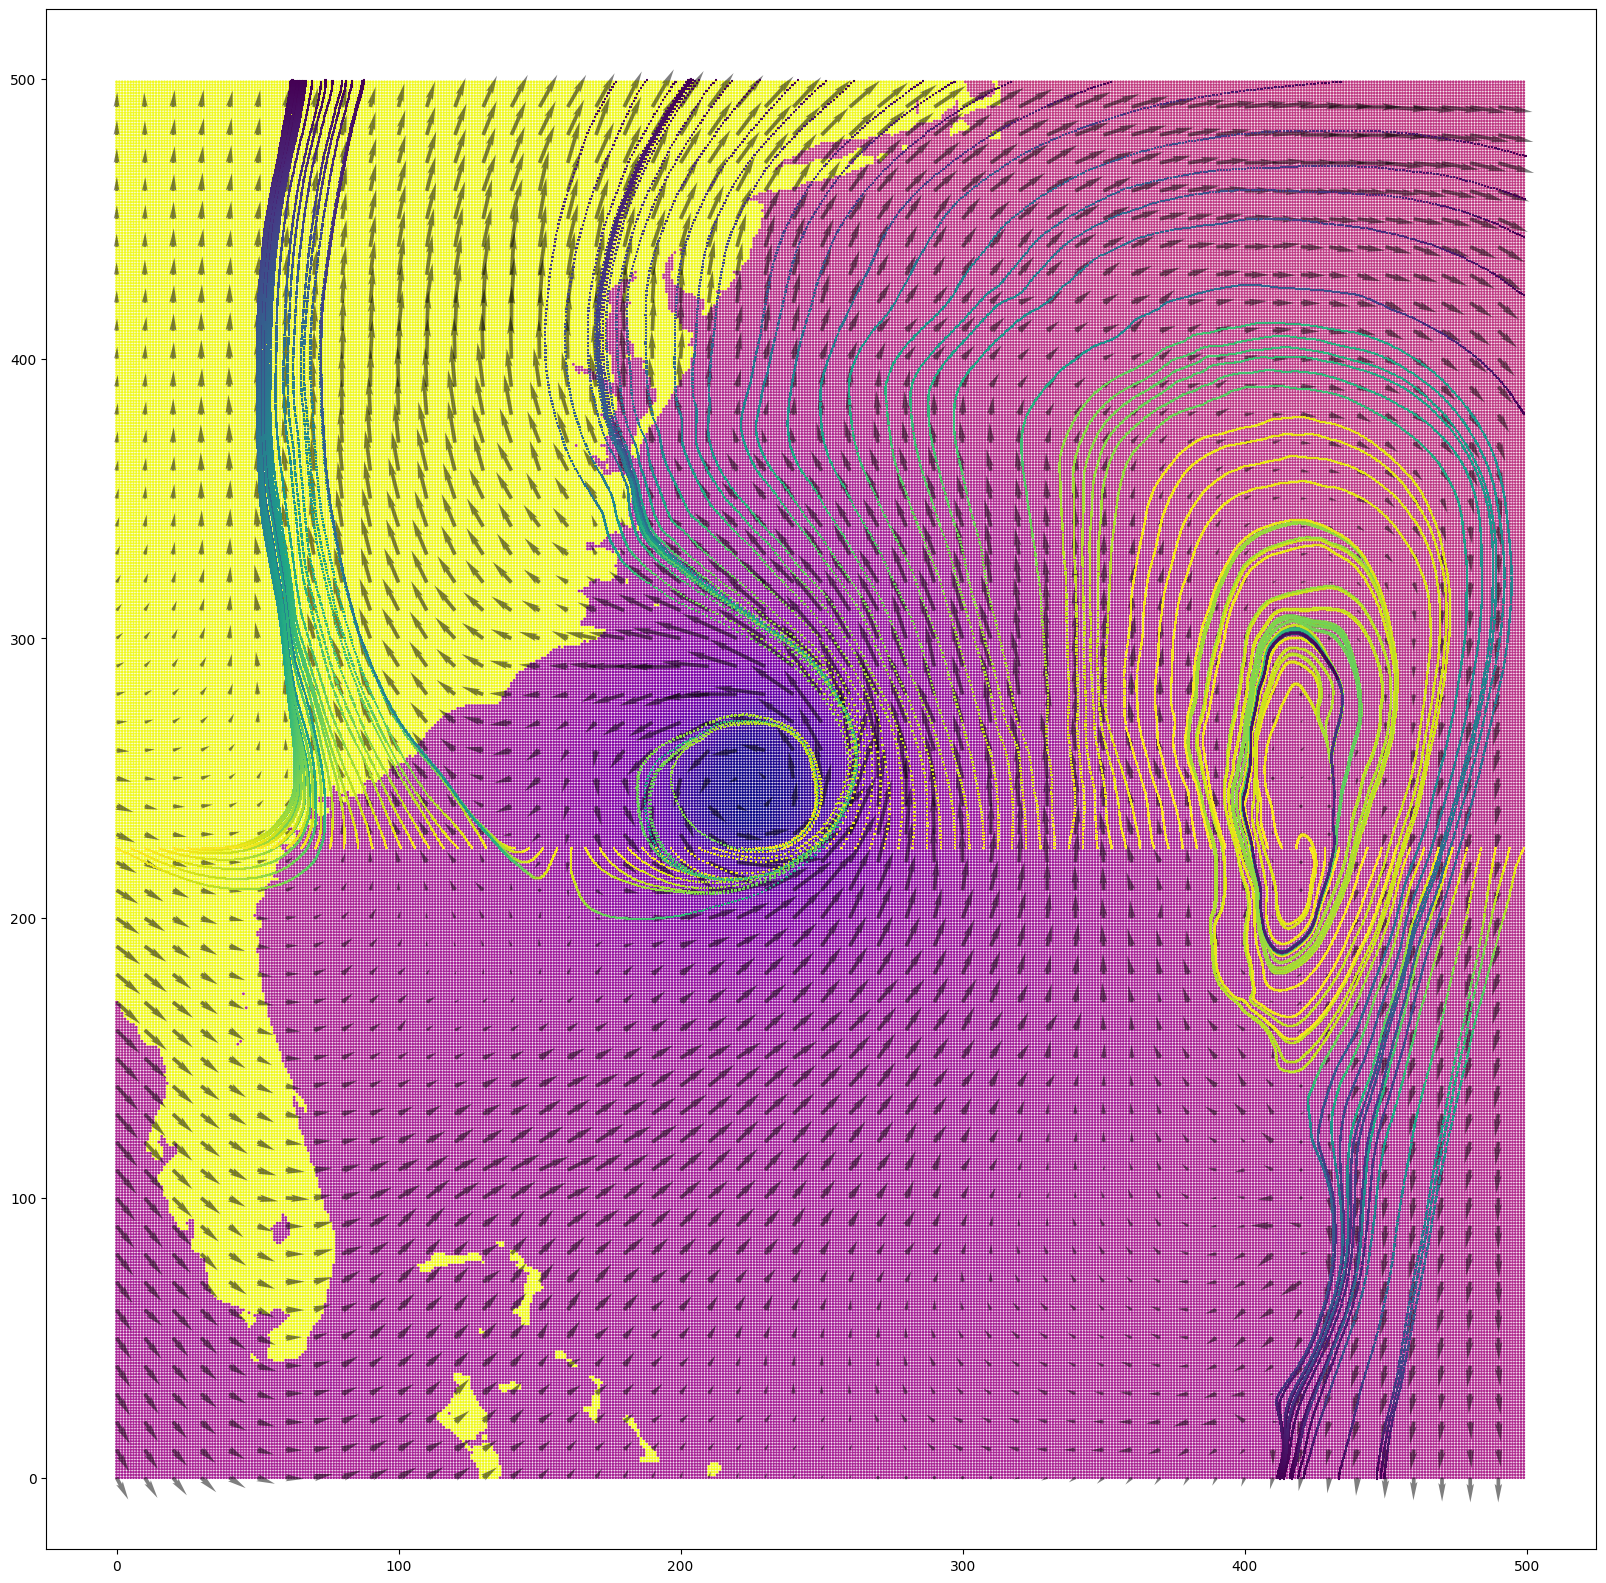

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

uData = []
vData = []

##### data loading and setup/plot image
##### argument "showBgMap": show or not to show the backfloor map
##### DO NOT modify this function
def Initialize( showBgMap = False ):
    global uData
    global vData
    
    loadFlowData = np.load("flowData.npy", allow_pickle=True)

    ### flow data
    uData = loadFlowData.item().get('uData')
    vData = loadFlowData.item().get('vData')

    plt.rcParams['figure.figsize'] = [20, 20]
    
    ### plot backgroup images
    presMapX = loadFlowData.item().get('presMapX')
    presMapY = loadFlowData.item().get('presMapY')
    presMapV = loadFlowData.item().get('presMapV')
    if showBgMap == True:
        plt.scatter(presMapX, presMapY, s=1, c=presMapV, cmap='plasma')
    
    ### plot arrows
    x_pos = loadFlowData.item().get('x_pos')
    y_pos = loadFlowData.item().get('y_pos')
    x_direct = loadFlowData.item().get('x_direct')
    y_direct = loadFlowData.item().get('y_direct')       
    plt.quiver(x_pos, y_pos, x_direct, y_direct, scale = 50,  headwidth = 2, headlength = 5, alpha = 0.5)


##### x, y: location. Return: 2D vector at [x,y] (x and y are integer only)
##### return: a 2D vector [u, v], u is horizontal direction (right is postivie), v is the vertical direction (up is positive)
##### DO NOT modify this function
def getDataVector(x, y):
    return uData[(499-y)+500*x], vData[(499-y)+500*x]


##### this function generates "numSeeds" points(seeds) from [startX, startY] to [endX, endY]
##### Return: seeds -> a list of [x, y] 
def generateSeeds(startX, startY, endX, endY, numSeeds):
    seeds = []
    x = np.linspace(startX, endX, numSeeds )
    y = np.linspace(startY, endY, numSeeds )
    seeds = np.zeros([numSeeds,2])
    seeds[:, 0] = x
    seeds[:, 1] = y
    return seeds

##### this function plot a particle tracing result on the screen
##### argument "path": particle tracing result. It is represetned by a list of [x, y]. (x, y) can be floating point
##### You may not want to modify this function
def drawOneParticleTracingResult( path ):
    ps = np.array(path)
    c = np.linspace(1, 0, num=ps.shape[0])
    plt.scatter(ps[:,0], ps[:,1], c=c, s=3, marker='_')

def clamp(n, minn, maxn):
    return max(min(maxn, n), minn)

def lerp(v1, v2, alpha):
    return [(1 - alpha) * v1[0] + alpha * v2[0], (1 - alpha) * v1[1] + alpha * v2[1]]

def get_interpolate_vector (pos):
    xfloor = clamp(math.floor(pos[0]), 0, 499)
    xceil = clamp(math.ceil(pos[0]), 0, 499)
    yfloor = clamp(math.floor(pos[1]), 0, 499)
    yceil = clamp(math.ceil(pos[1]), 0, 499)

    lt = getDataVector(xfloor, yfloor)
    rt = getDataVector(xceil, yfloor)
    lb = getDataVector(xfloor, yceil)
    rb = getDataVector(xceil, yceil)
    alpha = (pos[0] - math.floor(pos[0]))
    beta = (pos[1] - math.floor(pos[1]))
    return lerp(lerp(lt, rt, alpha), lerp(lb, rb, alpha), beta)
    

##### (TODO) WORK on this function
##### compute ONE particle tracing result
##### you should use "getDataVector())" to get the vector you want on the grid point
##### if you need the vector between grid points, you have to implment the vector interpolation by your self
##### I do not mind the computation is efficnet or not
##### "seed": one seed (x,y)
##### "t": delta t (i suggest 0.025)
##### "steps": how many stesp for this particle tracing process
def particleTrace(seed, t, steps):
    p = [seed[0], seed[1]]
    path = [p]
    for i in range(steps):
        v1 = get_interpolate_vector(p)
        a = [2 * t * v1[0], 2 * t * v1[1]]
        v2 = get_interpolate_vector([p[0] + a[0] / 2, p[1] + a[1] / 2])
        b = [2 * t * v2[0], 2 * t * v2[1]]
        v3 = get_interpolate_vector([p[0] + b[0] / 2, p[1] + b[1] / 2])
        c = [2 * t * v3[0], 2 * t * v3[1]]
        v4 = get_interpolate_vector([p[0] + c[0] / 2, p[1] + c[1] / 2])
        d = [2 * t * v4[0], 2 * t * v4[1]]
        pk = [p[0] + (a[0] + 2 * b[0] + 2 * c[0] + d[0]) / 6, p[1] + (a[1] + 2 * b[1] + 2 * c[1] + d[1]) / 6]
        path.append(pk)
        p = [pk[0], pk[1]]
        if pk[0] < 0 or 499 < pk[0] or pk[1] < 0 or 499 < pk[1]:
            break
    return path

##### main (if you want, you can change the arguments in the generateSeeds() and the last argument in particleTrace() )
Initialize(True) ## set False to disable backgroup image display (faster a little bit)

seeds = generateSeeds(0, 225, 499, 225, 100) ##this line generates seeds (seeds to generate the graph on the homework description slides)
    
for seed in seeds: ###iterate through all seeds
    path = particleTrace(seed, 0.025, 10000) # compute one particle tracing of the "seed", result is a list of [x,y ]
    drawOneParticleTracingResult(path) # draw one particle path

plt.show()